In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('customer_churn.csv')

In [124]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [168]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [170]:
df['customerID'].duplicated().sum()

np.int64(0)

In [126]:
# I apply lambda function to convert the binary values in YES and NO
df.SeniorCitizen=df.SeniorCitizen.apply(lambda x: 'Yes' if x==1 else 'No')


In [160]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6439,9137-UIYPG,Female,No,Yes,Yes,35,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,106.90,3756.45,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3801,5914-DVBWJ,Female,Yes,No,No,18,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,85.45,1505.85,Yes
6078,9691-HKOVS,Female,No,Yes,No,55,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,90.15,4916.95,No
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [166]:
df.TotalCharges=df.TotalCharges.replace(' ','0').astype('float')

In [128]:
df.shape

(7043, 21)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


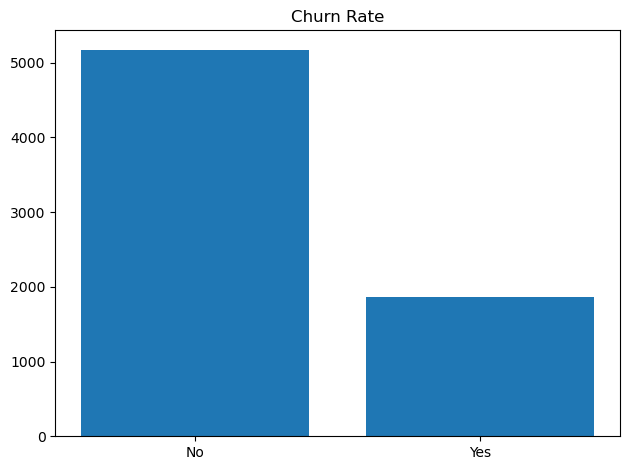

In [193]:
#Visualizing the overall churn rate to see how many customers have churned compared to those who stayed.
df_churn=df['Churn'].value_counts()
plt.bar(df_churn.index,df_churn.values)
plt.title('Churn Rate')
plt.tight_layout()
plt.savefig('Churn_Rate.png',dpi=300,bbox_inches='tight')
plt.show()

#### The churn rate visualization clearly shows the imbalance between customers who stayed 
##### and those who churned. While the majority of customers have stayed, a significant portion (~26-27%) has churned.This highlights that customer retention is a major issue for the company and requires focused strategies to reduce churn.


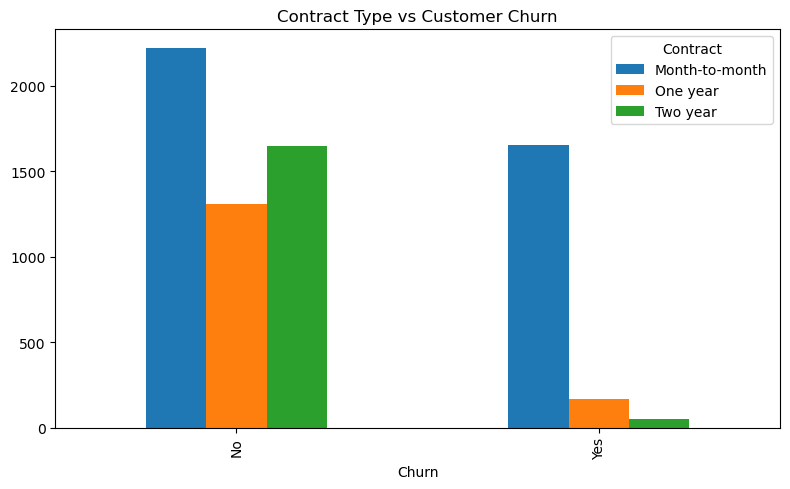

In [194]:
#This graph compares how different contract types (Month-to-Month, One year, Two year) relate to churn.
contract_churn=df.groupby('Churn')['Contract'].value_counts().unstack()
contract_churn_percent = contract_churn.div(contract_churn.sum(axis=1), axis=0) * 100
contract_churn.plot(kind="bar", figsize=(8,5))
plt.title('Contract Type vs Customer Churn')
plt.tight_layout()

plt.savefig('Contract_Type_vs_Customer_Churn.png',dpi=300,bbox_inches='tight')
plt.show()


#### Month-to-month contracts have the highest churn, while one-year and two-year contracts show much lower churn, indicating longer commitments improve retention.


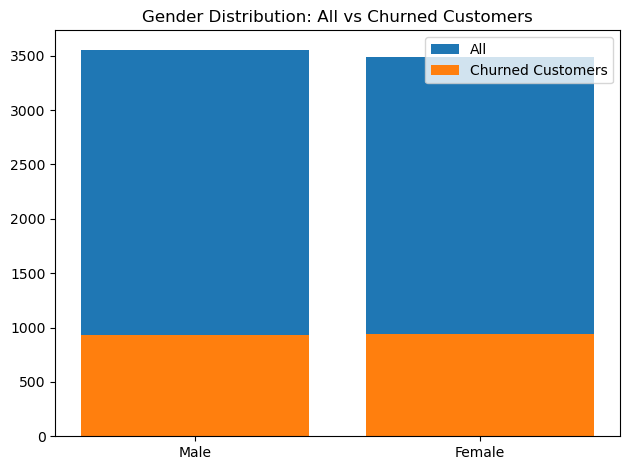

In [195]:
#This chart compares gender distribution between the overall customer base and those who churned.
dfchurn = df[df['Churn']=='Yes']
dfcg=dfchurn['gender'].value_counts()
dfg=df['gender'].value_counts()
plt.bar(dfg.index,dfg.values,label='All')
plt.bar(dfcg.index,dfcg.values, label='Churned Customers')
plt.title('Gender Distribution: All vs Churned Customers')
plt.legend()
plt.tight_layout()
plt.savefig('Gender_Distribution_All_vs_Churned_Customers.png',dpi=300,bbox_inches='tight')
plt.show()

#### Gender has not any impact on churn, as the churn distribution is almost proportional to the overall customer base.


In [133]:
#df[(df.Contract=='Month-to-month') & (df.InternetService=='Fiber optic') & (df.Churn=='Yes')].shape[0]

In [134]:
#df[(df["InternetService"] == "Fiber optic") & (df["Contract"] == "Month-to-month")]


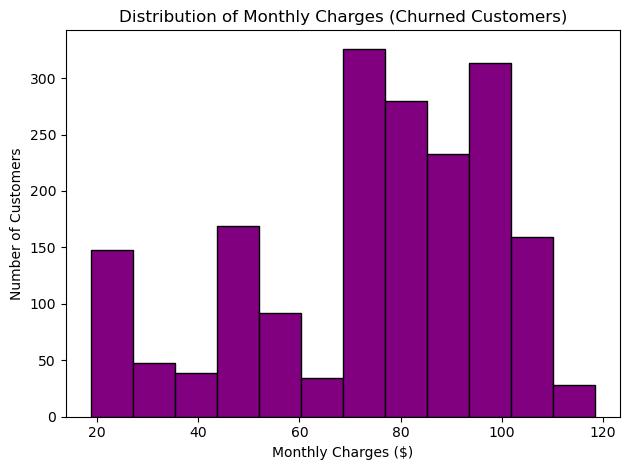

In [196]:
#This histogram shows how monthly charges are distributed among churned customers.

plt.hist(
    dfchurn['MonthlyCharges'], 
    bins=12,                
    color='purple', 
    edgecolor='black'
)
plt.title("Distribution of Monthly Charges (Churned Customers)")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.savefig('Distribution_of_monthly_charges.png',dpi=300,bbox_inches='tight')
plt.show()

#### Churned customers are more concentrated in higher monthly charges, suggesting cost is a key driver of churn.


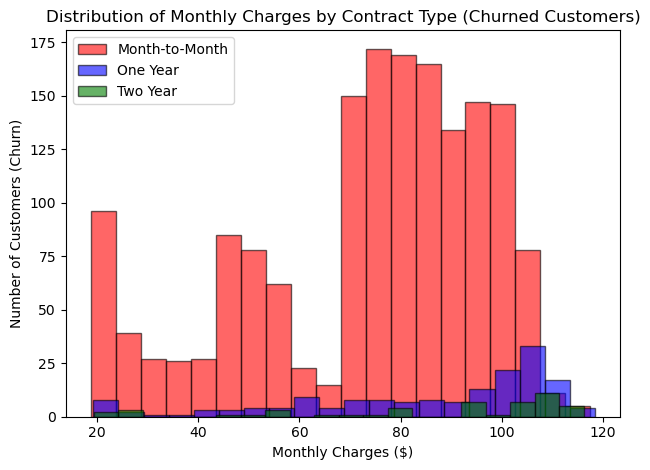

In [197]:
#This histogram compares how monthly charges are distributed among churned customers across different contract types
plt.hist(
    dfchurn[dfchurn.Contract=='Month-to-month']['MonthlyCharges'],
    bins=20, edgecolor='black', alpha=0.6, color='red', label='Month-to-Month'
)

plt.hist(
    dfchurn[dfchurn.Contract=='One year']['MonthlyCharges'],
    bins=20, edgecolor='black', alpha=0.6, color='blue', label='One Year'
)

plt.hist(
    dfchurn[dfchurn.Contract=='Two year']['MonthlyCharges'],
    bins=20, edgecolor='black', alpha=0.6, color='green', label='Two Year'
)

plt.title("Distribution of Monthly Charges by Contract Type (Churned Customers)")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Number of Customers (Churn)")
plt.legend()
plt.tight_layout()
plt.savefig('MonthlyCharges_by_conntract_type.png',dpi=300,bbox_inches='tight')

plt.show()


#### Most churned customers on month-to-month contracts face higher monthly charges, while churn is rare for one-year and two-year contracts regardless of charges. 


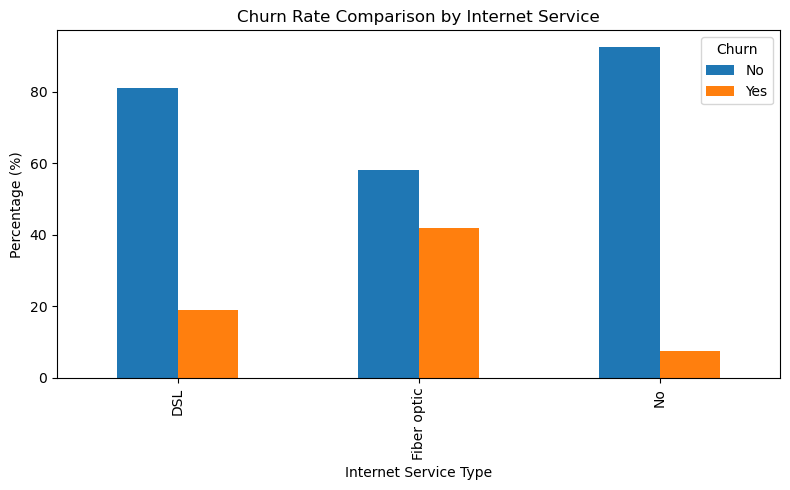

In [191]:
# This bar chart compares churn rates across different Internet service types

churn_counts = df.groupby("InternetService")["Churn"].value_counts().unstack()
churn_percent = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100
churn_percent.plot(kind="bar", figsize=(8,5))
plt.title("Churn Rate Comparison by Internet Service")
plt.ylabel("Percentage (%)")
plt.xlabel("Internet Service Type")
plt.legend(title="Churn")
plt.tight_layout()
plt.savefig('Churn_Rate_by_internet_sseervice.png',dpi=300,bbox_inches='tight')
plt.show()


#### Customers with Fiber optic service churn significantly more compared to those with DSL or no internet service, suggesting dissatisfaction with fiber-related costs or service quality.

In [138]:
#dfchurn[(((dfchurn['InternetService']=='Fiber optic') | (dfchurn.Contract=='Month-to-month')) | (dfchurn.TechSupport=='No'))|(dfchurn.PaymentMethod)]

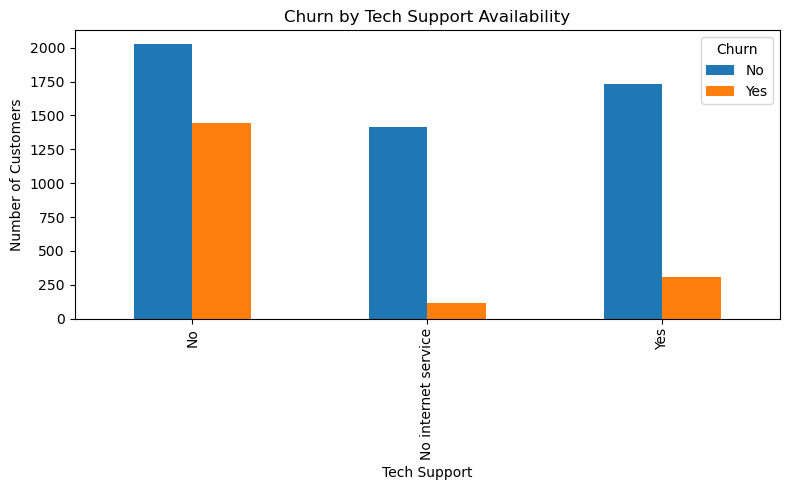

In [198]:
# This bar chart shows the relationship between tech support availability and churn
dfchurn[dfchurn.TechSupport == 'No']
dft = df.groupby('TechSupport')['Churn'].value_counts().unstack()
dft.plot(kind='bar', figsize=(8,5))
plt.title("Churn by Tech Support Availability")
plt.xlabel("Tech Support")
plt.ylabel("Number of Customers")
plt.legend(title="Churn")
plt.tight_layout()
plt.savefig('Churn_by_techsupportt.png',dpi=300,bbox_inches='tight')
plt.show()


#### Customers without tech support churn significantly more, showing that support services play a key role in retention.


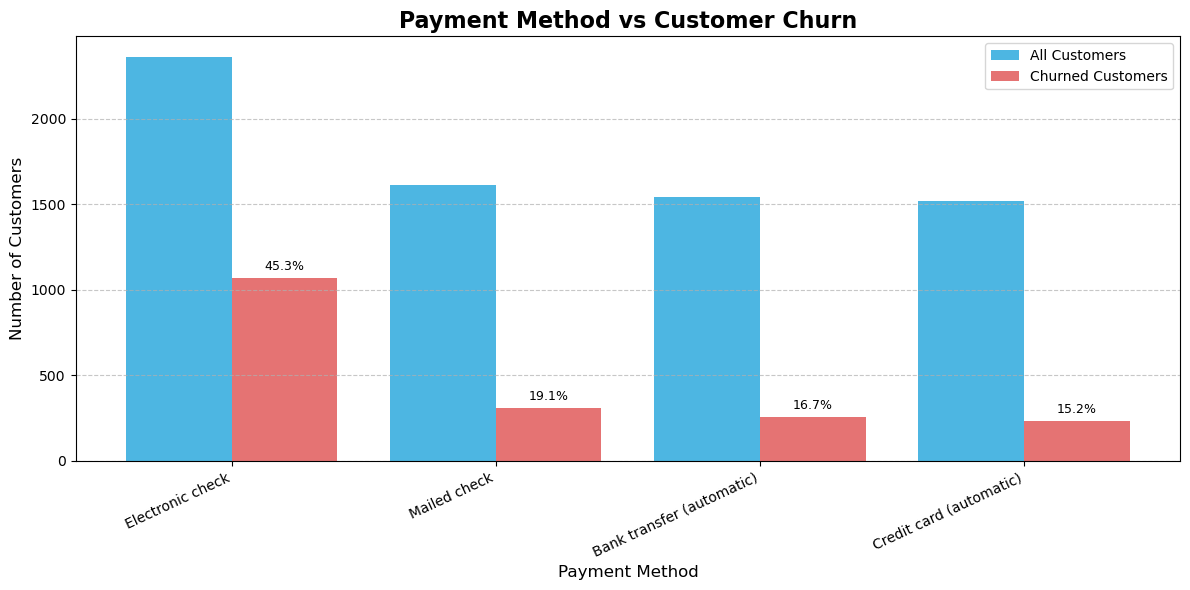

In [192]:
# These pie charts compare the distribution of payment methods between all customers 
# and churned customers. This helps identify which payment method groups have higher churn.
dfpc = df['PaymentMethod'].value_counts()
dfpcc = dfchurn['PaymentMethod'].value_counts()
dfpcc = dfpcc.reindex(dfpc.index, fill_value=0)
x = list(range(len(dfpc.index)))
width = 0.4  # bar width
plt.figure(figsize=(12,6))
plt.bar([i - width/2 for i in x], dfpc.values, width=width, label="All Customers", color="#4DB6E2")
plt.bar([i + width/2 for i in x], dfpcc.values, width=width, label="Churned Customers", color="#E57373")
plt.title("Payment Method vs Customer Churn", fontsize=16, fontweight="bold")
plt.xlabel("Payment Method", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(x, dfpc.index, rotation=25, ha="right")
plt.legend()
churn_rate = (dfpcc.values / dfpc.values) * 100
for i, rate in enumerate(churn_rate):
    plt.text(i + width/2, dfpcc.values[i] + max(dfpc.values)*0.02, 
             f"{rate:.1f}%", ha="center", fontsize=9, color="black")

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("Churn_by_payment_method.png", dpi=300, bbox_inches="tight")
plt.show()


#### Customers using Electronic check have the highest churn rates compared to those paying by credit card, mailed check, or bank transfer. This suggests payment method convenience/security affects retention.

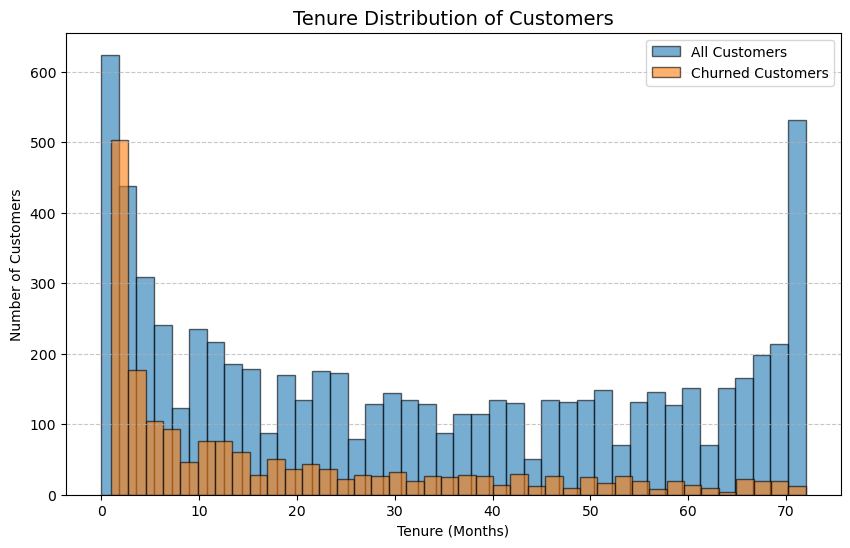

In [199]:
#This histogram compares the tenure distribution of all customers versus churned customers
plt.figure(figsize=(10,6))

plt.hist(df['tenure'], bins=40, edgecolor='black', alpha=0.6, label="All Customers")
plt.hist(dfchurn['tenure'], bins=40, edgecolor='black', alpha=0.6, label="Churned Customers")

plt.title("Tenure Distribution of Customers", fontsize=14)
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('Tenure_Distribution.png',dpi=300,bbox_inches='tight')
plt.show()

#### Churn is highest among customers with low tenure, while long-tenured customers are far less likely to leave.


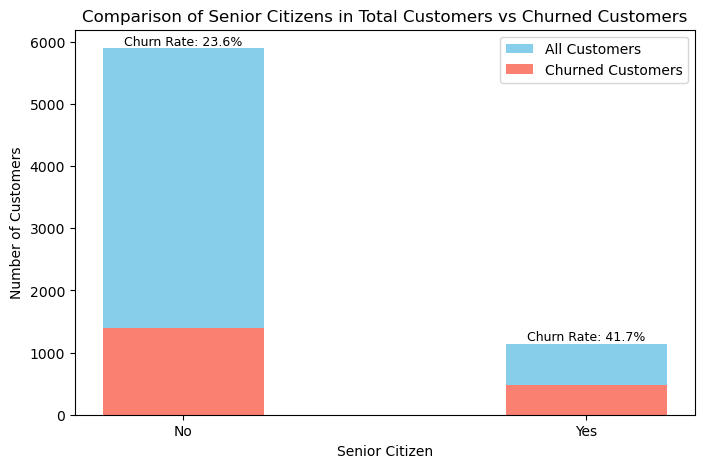

In [190]:
plt.figure(figsize=(8,5))

plt.bar(dfsc.index, dfsc.values, width=0.4, label="All Customers", color="skyblue")

plt.bar(dfscc.index, dfscc.values, width=0.4, label="Churned Customers", color="salmon")
plt.xlabel("Senior Citizen")
plt.ylabel("Number of Customers")
plt.title("Comparison of Senior Citizens in Total Customers vs Churned Customers")
plt.legend()

churn_rate = (dfscc.values / dfsc.values) * 100
for i, rate in enumerate(churn_rate):
    plt.text(i, dfsc.values[i] + 50, f"Churn Rate: {rate:.1f}%", ha="center", fontsize=9)
plt.savefig('Senior_Citizen_Churn.png',dpi=300,bbox_inches='tight')
plt.show()


### Senior citizens show a noticeably higher churn percentage compared to non-senior customers, indicating age group has a role in retention.

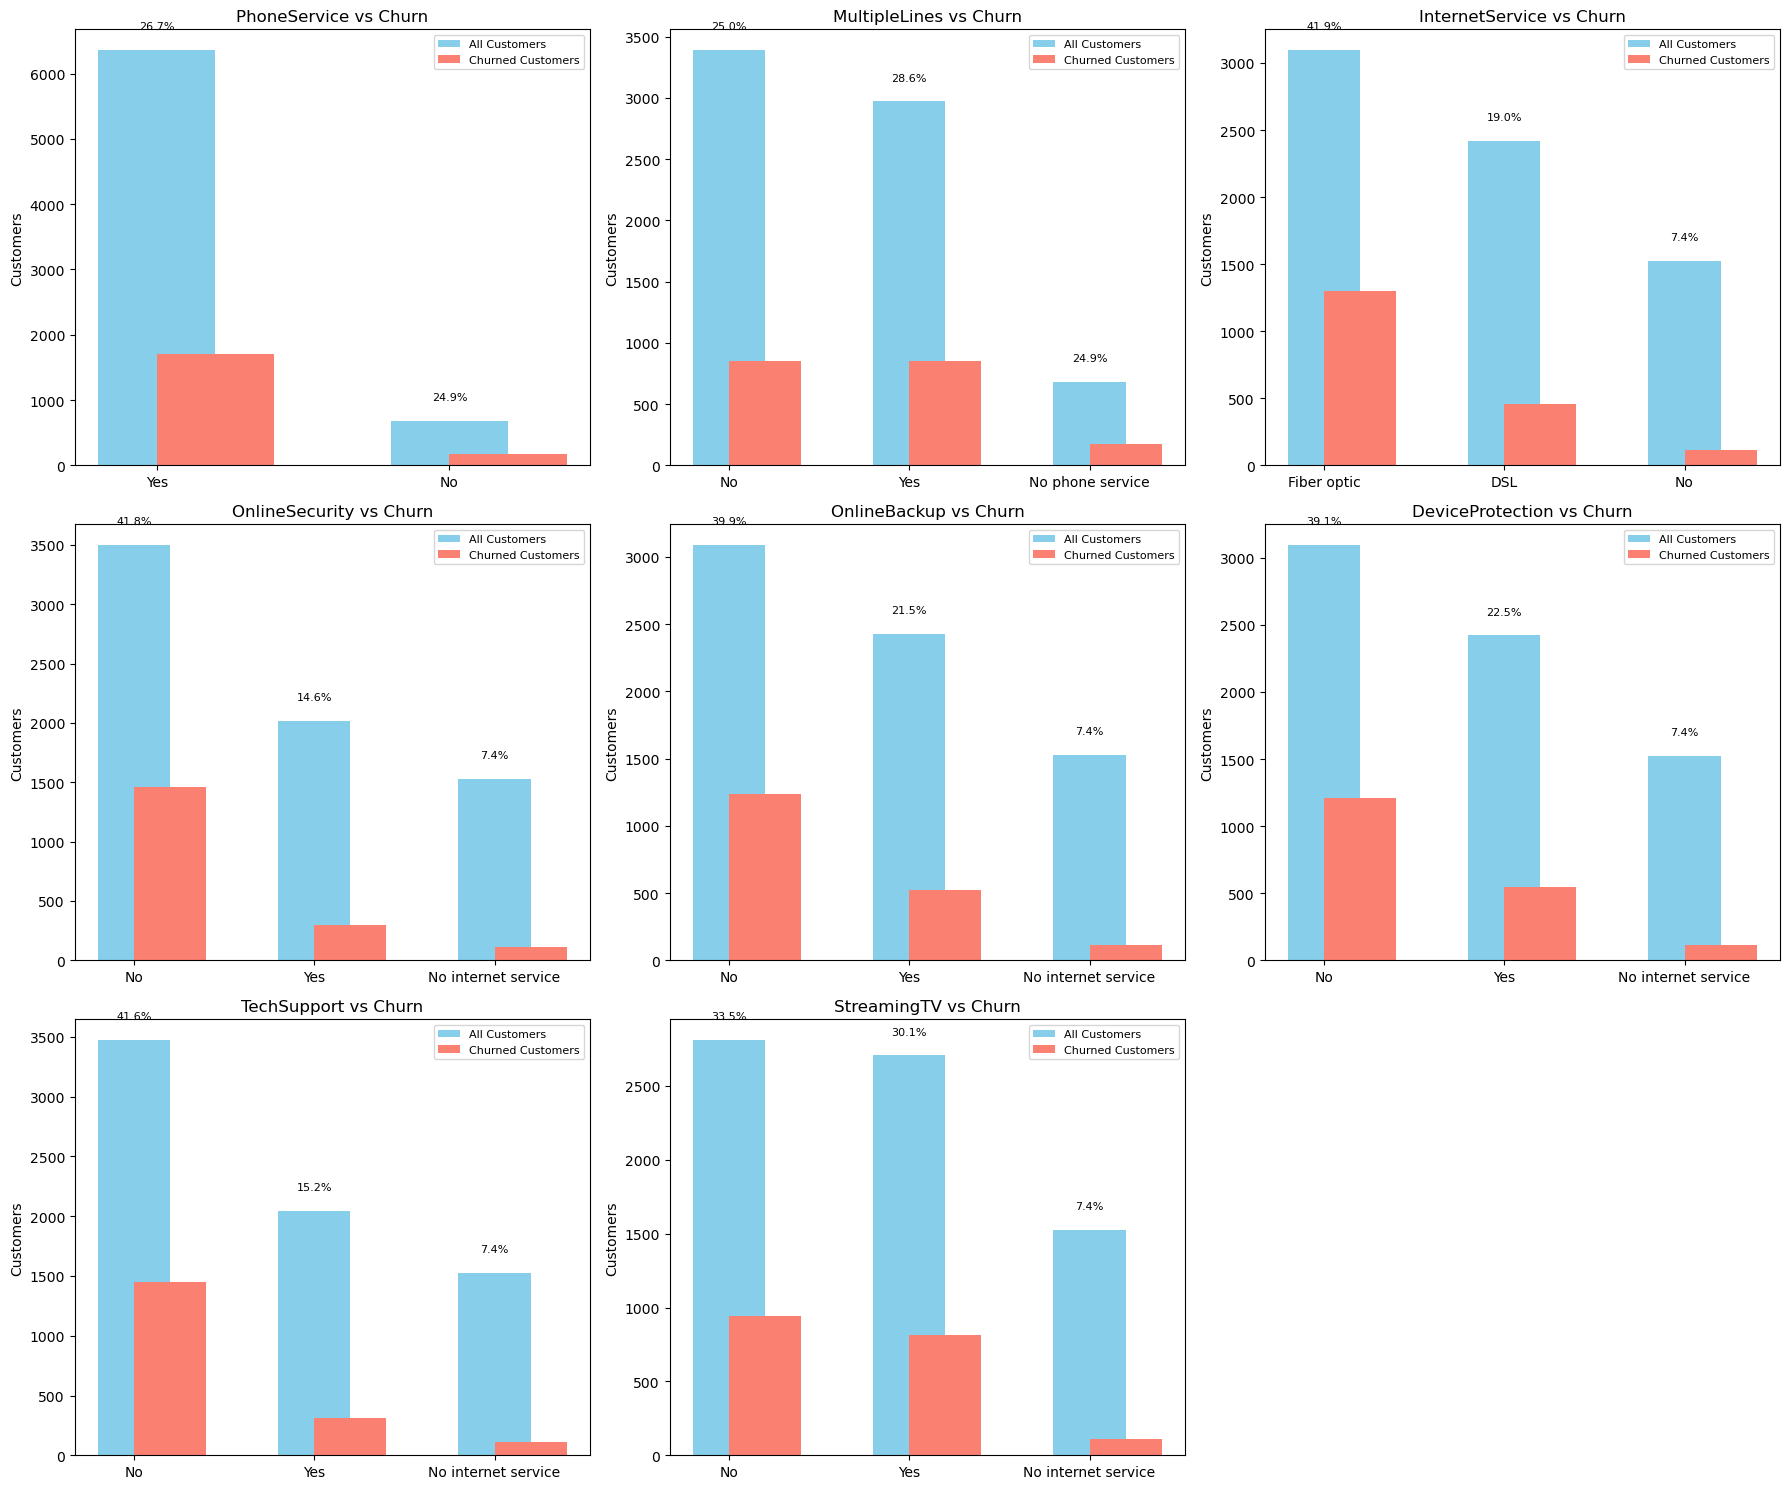

In [200]:
import matplotlib.pyplot as plt
import math

# List of categorical columns you want to analyze
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV']

# Number of rows needed (3 plots per row)
ncols = 3
nrows = math.ceil(len(cols) / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(18, 5*nrows))
axes = axes.flatten()  # make it 1D array for easy looping

for i, col in enumerate(cols):
    ax = axes[i]
    
    # Count distribution
    counts_all = df[col].value_counts()
    counts_churn = df[df["Churn"]=="Yes"][col].value_counts()
    
    # Align indexes
    counts_churn = counts_churn.reindex(counts_all.index, fill_value=0)
    
    # Plot bars
    ax.bar(counts_all.index, counts_all.values, width=0.4, label="All Customers", color="skyblue")
    ax.bar([x for x in range(len(counts_churn.index))], counts_churn.values, 
           width=0.4, label="Churned Customers", color="salmon", align="edge")
    
    # Labels and title
    ax.set_title(f"{col} vs Churn", fontsize=12)
    ax.set_ylabel("Customers")
    ax.legend(fontsize=8)

    # Show churn rate %
    churn_rate = (counts_churn.values / counts_all.values) * 100
    for j, rate in enumerate(churn_rate):
        ax.text(j, counts_all.values[j] + max(counts_all.values)*0.05, 
                f"{rate:.1f}%", ha="center", fontsize=8)

# Remove unused axes (if any)
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('Some_basic_barplots.png',dpi=300,bbox_inches='tight')
plt.show()


#### Customers lacking value-added services (like OnlineSecurity, TechSupport, DeviceProtection, or OnlineBackup) show much higher churn, while those subscribed to these services are more likely to stay.
